
####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.3303 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


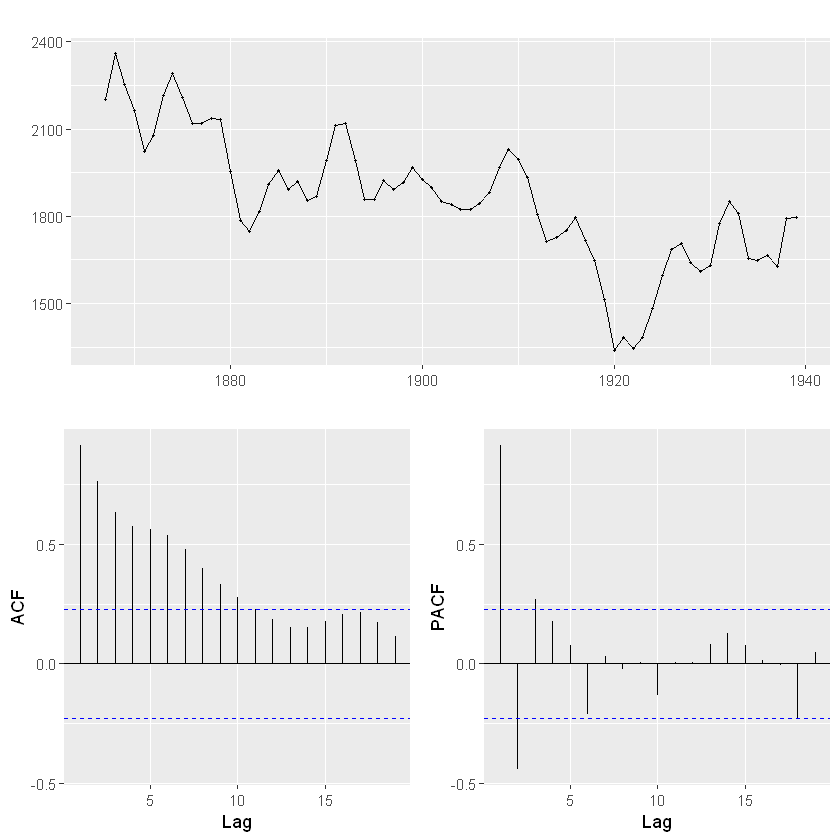

In [3]:
library(forecast)
library(fpp2)
library(ggplot2)
library(urca)

#identification
ggtsdisplay(sheep)

summary(ur.kpss(sheep))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.074 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


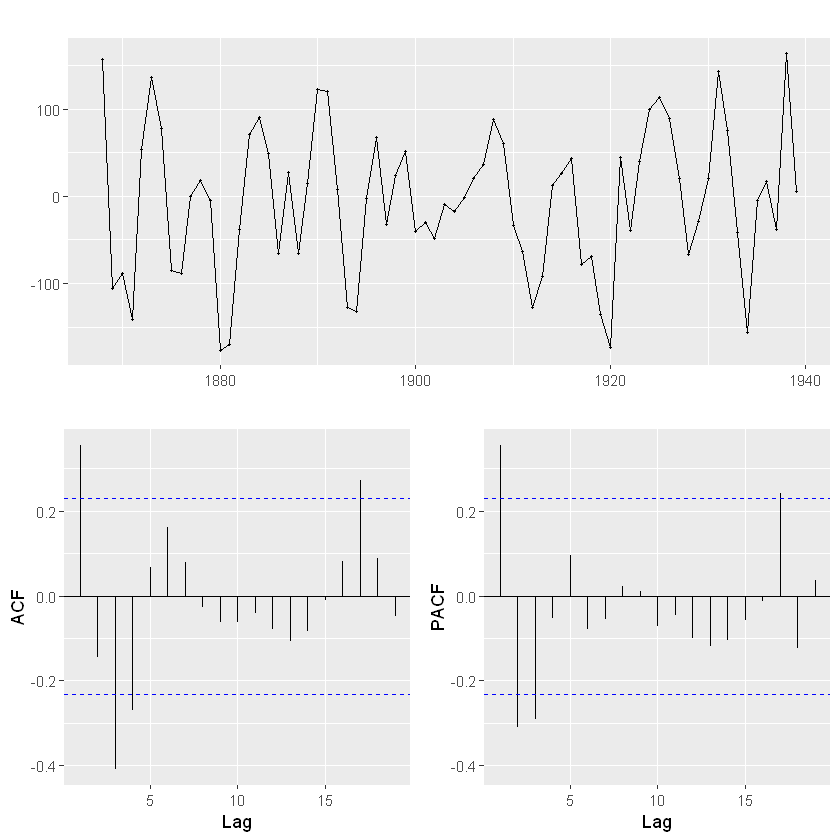

In [5]:
sheep_d <- diff(sheep)

ggtsdisplay(sheep_d)

summary(ur.kpss(sheep_d))

In [6]:
# estimation
arima_111 <- Arima(sheep, order=c(1,1,1), include.mean=FALSE)
arima_111

arima_112 <- Arima(sheep, order=c(1,1,2), include.mean=FALSE)
arima_112

arima_211 <- Arima(sheep, order=c(2,1,1), include.mean=FALSE)
arima_211

Series: sheep 
ARIMA(1,1,1) 

Coefficients:
         ar1     ma1
      0.0671  0.4267
s.e.  0.2371  0.2206

sigma^2 estimated as 5822:  log likelihood=-413.38
AIC=832.75   AICc=833.11   BIC=839.58

Series: sheep 
ARIMA(1,1,2) 

Coefficients:
          ar1     ma1     ma2
      -0.1796  0.6912  0.2452
s.e.   0.3774  0.3506  0.2202

sigma^2 estimated as 5859:  log likelihood=-413.1
AIC=834.2   AICc=834.8   BIC=843.31

Series: sheep 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.9150  -0.5454  -0.4553
s.e.  0.1725   0.1066   0.1885

sigma^2 estimated as 5109:  log likelihood=-408.35
AIC=824.7   AICc=825.3   BIC=833.81


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 12.787, df = 8, p-value = 0.1194

Model df: 2.   Total lags used: 10




	Box-Ljung test

data:  arima_111$residuals
X-squared = 12.787, df = 10, p-value = 0.2358


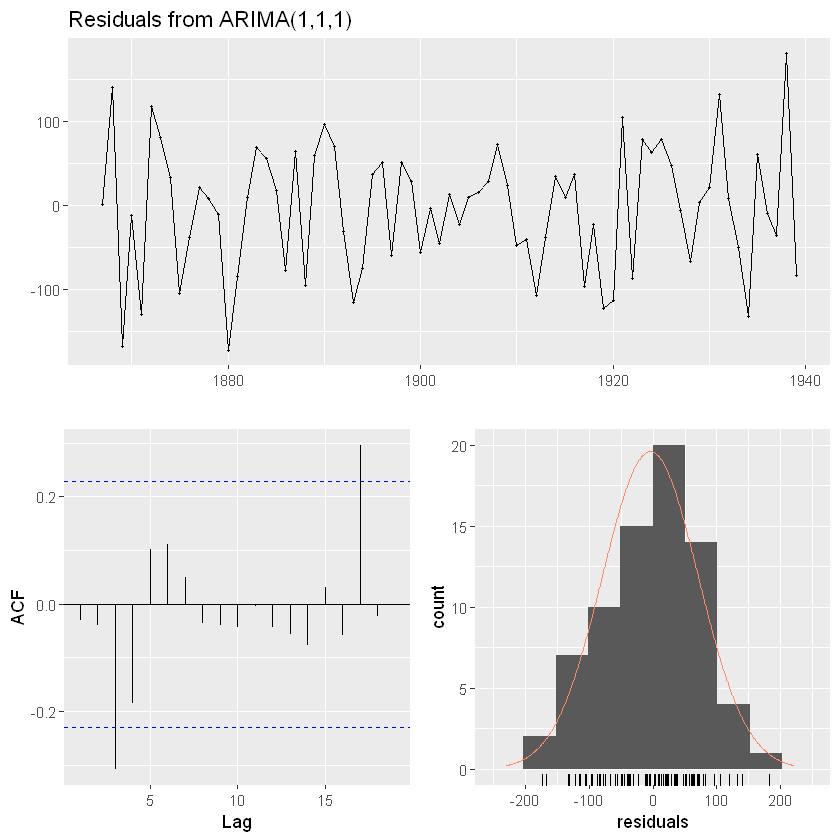

In [7]:
# diagnostic checking
# 적합성 진단 way1
checkresiduals(arima_111)

# 적합성 진단 way2
Box.test(arima_111$residuals, lag=10, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 11.637, df = 7, p-value = 0.1131

Model df: 3.   Total lags used: 10




	Box-Ljung test

data:  arima_112$residuals
X-squared = 11.637, df = 10, p-value = 0.3101


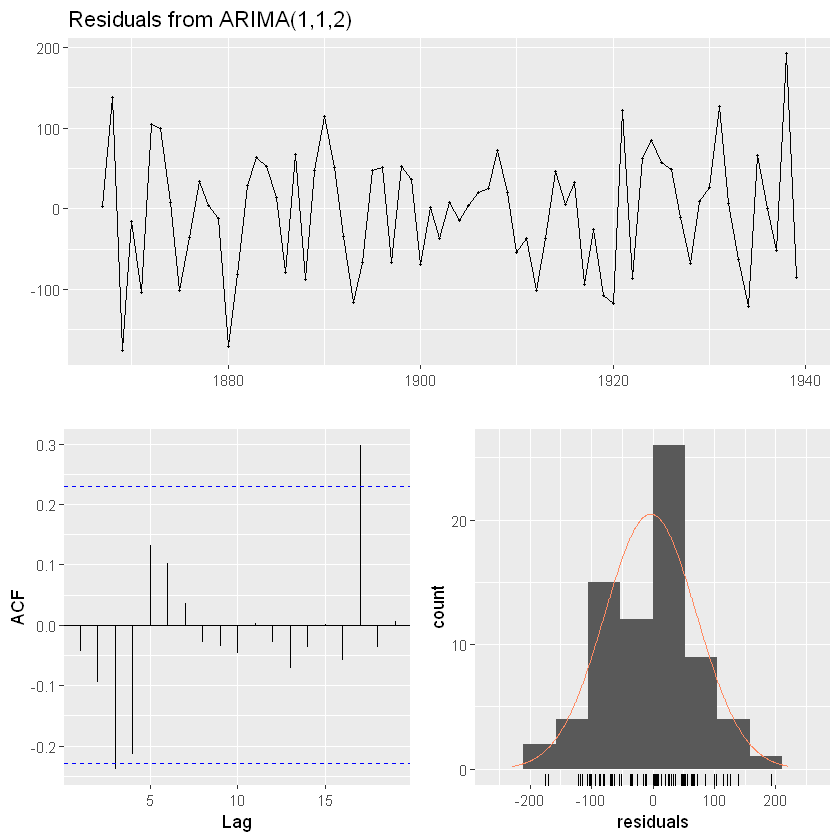

In [8]:
# 적합성 진단 way1
checkresiduals(arima_112)

# 적합성 진단 way2
Box.test(arima_112$residuals, lag=10, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 4.7072, df = 7, p-value = 0.6956

Model df: 3.   Total lags used: 10




	Box-Ljung test

data:  arima_211$residuals
X-squared = 4.7072, df = 10, p-value = 0.9099


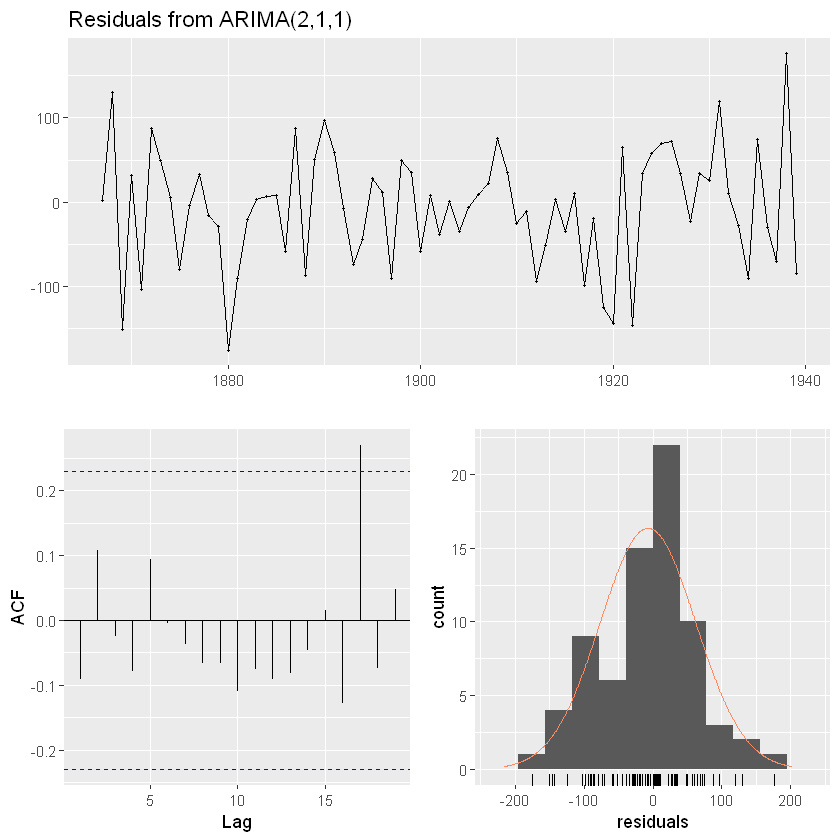

In [9]:
# 적합성 진단 way1
checkresiduals(arima_211)

# 적합성 진단 way2
Box.test(arima_211$residuals, lag=10, type="Ljung-Box")


Forecast method: ARIMA(1,1,1)

Model Information:
Series: sheep 
ARIMA(1,1,1) 

Coefficients:
         ar1     ma1
      0.0671  0.4267
s.e.  0.2371  0.2206

sigma^2 estimated as 5822:  log likelihood=-413.38
AIC=832.75   AICc=833.11   BIC=839.58

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -4.020067 74.71621 60.31778 -0.2438581 3.320065 0.8987749
                    ACF1
Training set -0.02946163

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1940       1762.206 1664.423 1859.989 1612.660 1911.753
1941       1759.870 1584.094 1935.646 1491.044 2028.697
1942       1759.713 1529.083 1990.344 1406.994 2112.433
1943       1759.703 1484.841 2034.564 1339.338 2180.067
1944       1759.702 1446.794 2072.610 1281.150 2238.254
1945       1759.702 1412.896 2106.508 1229.308 2290.097
1946       1759.702 1382.028 2137.376 1182.100 2337.305
1947       1759.702 1353.499 2165.905 1138.469 2380.936
1948       1759.702 1326.84

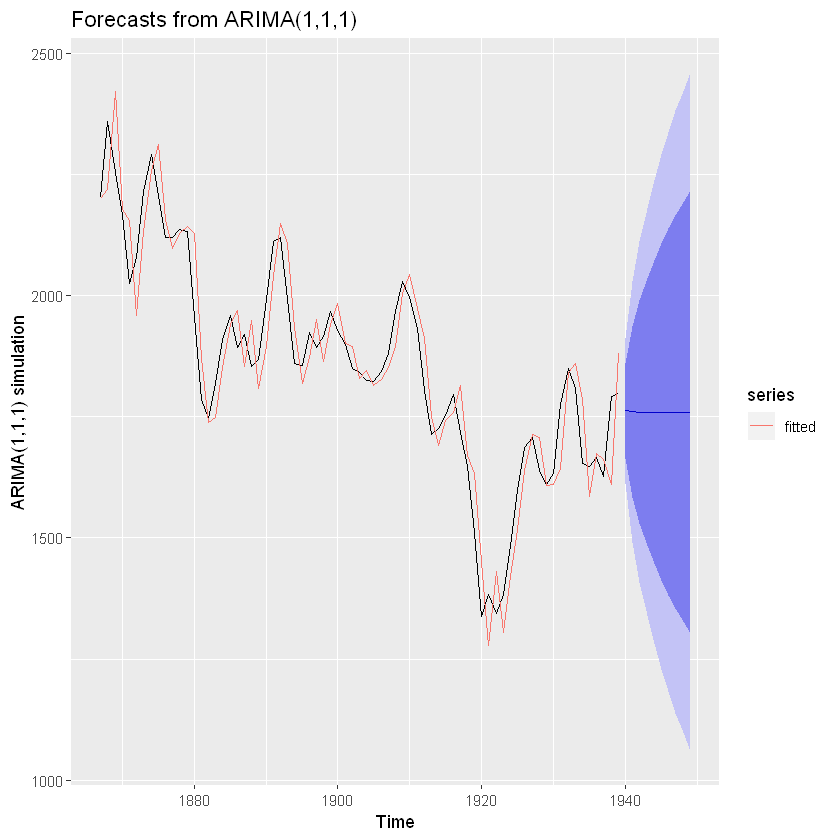

In [10]:
# forecasting
# 테스트
arima_111_F <- forecast(arima_111, h=10)
summary(arima_111_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_111_F) + autolayer(fitted(arima_111_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,1,1) simulation")


Forecast method: ARIMA(1,1,2)

Model Information:
Series: sheep 
ARIMA(1,1,2) 

Coefficients:
          ar1     ma1     ma2
      -0.1796  0.6912  0.2452
s.e.   0.3774  0.3506  0.2202

sigma^2 estimated as 5859:  log likelihood=-413.1
AIC=834.2   AICc=834.8   BIC=843.31

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set -3.70832 74.42045 59.98869 -0.2184497 3.308697 0.8938712
                    ACF1
Training set -0.04360289

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1940       1784.318 1686.219 1882.417 1634.288 1934.347
1941       1765.731 1587.932 1943.530 1493.811 2037.651
1942       1769.069 1527.641 2010.498 1399.836 2138.302
1943       1768.470 1478.490 2058.449 1324.984 2211.955
1944       1768.577 1436.848 2100.307 1261.241 2275.914
1945       1768.558 1399.813 2137.303 1204.612 2332.504
1946       1768.562 1366.186 2170.937 1153.181 2383.942
1947       1768.561 1335.158 2201.964 1105.728 2431.394
1948 

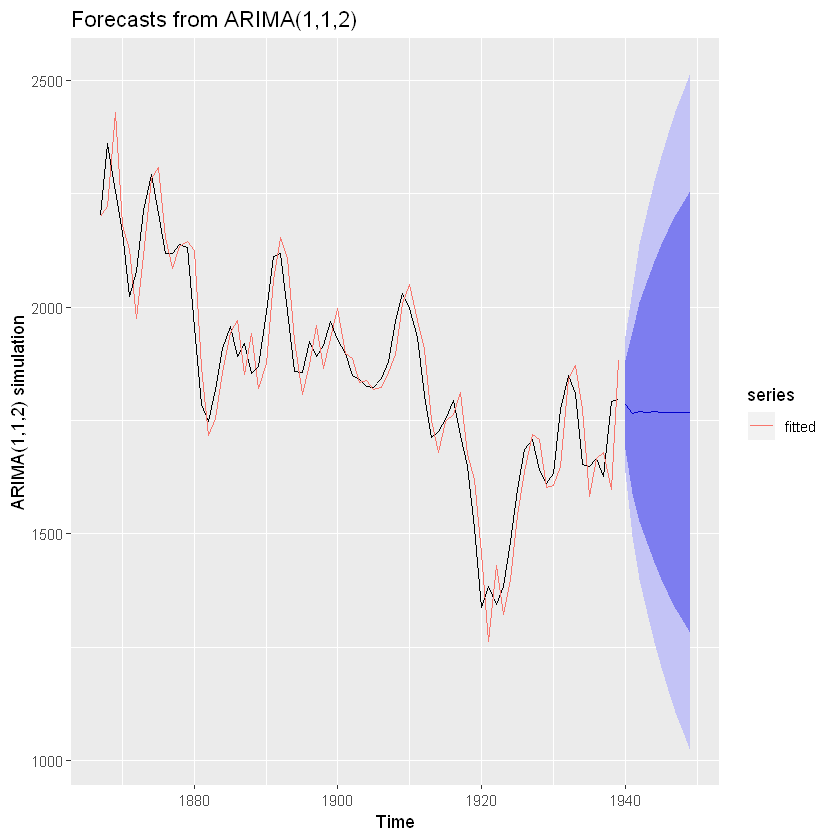

In [11]:
# 테스트
arima_112_F <- forecast(arima_112, h=10)
summary(arima_112_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_112_F) + autolayer(fitted(arima_112_F),series="fitted") + xlab("Time") + ylab("ARIMA(1,1,2) simulation")


Forecast method: ARIMA(2,1,1)

Model Information:
Series: sheep 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.9150  -0.5454  -0.4553
s.e.  0.1725   0.1066   0.1885

sigma^2 estimated as 5109:  log likelihood=-408.35
AIC=824.7   AICc=825.3   BIC=833.81

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -7.139146 69.49203 54.04863 -0.4606746 3.012028 0.8053604
                    ACF1
Training set -0.09098472

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1940       1751.523 1659.920 1843.125 1611.429 1891.617
1941       1706.640 1544.560 1868.720 1458.760 1954.520
1942       1690.377 1487.345 1893.409 1379.866 2000.888
1943       1699.978 1478.356 1921.600 1361.036 2038.920
1944       1717.632 1486.815 1948.449 1364.628 2070.637
1945       1728.549 1489.947 1967.151 1363.638 2093.460
1946       1728.909 1480.241 1977.576 1348.605 2109.212
1947       1723.283 1461.756 1984.811 1323.311 2123.255

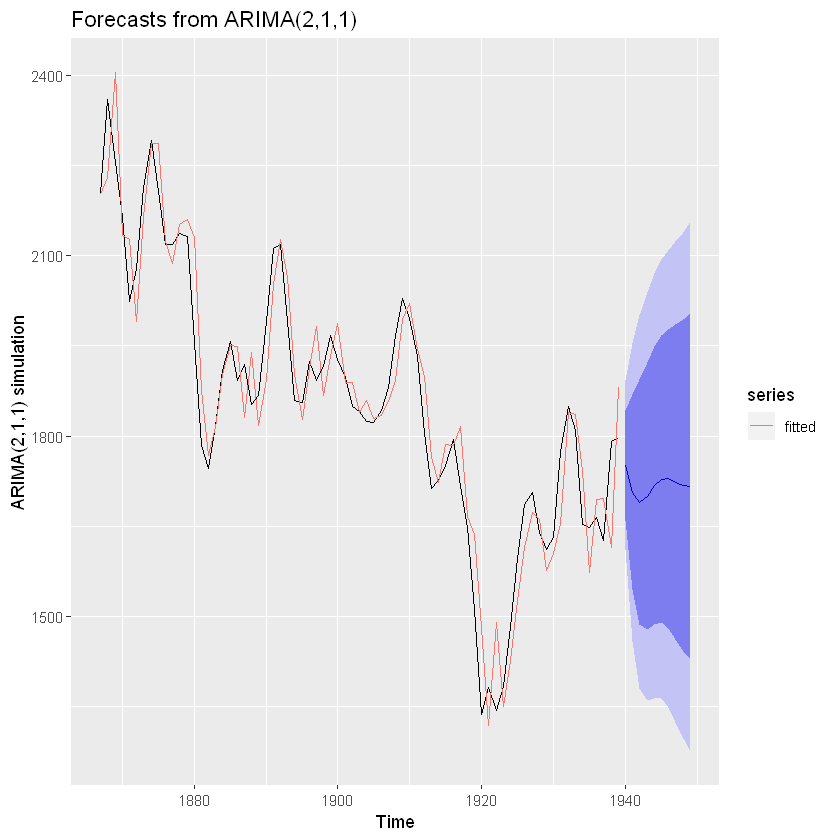

In [12]:
# 테스트
arima_211_F <- forecast(arima_211, h=10)
summary(arima_211_F)

# 적합된 데이터, 예측값, 원계열데이터를 차트로 표현
autoplot(arima_211_F) + autolayer(fitted(arima_211_F),series="fitted") + xlab("Time") + ylab("ARIMA(2,1,1) simulation")

In [13]:
library(data.table)
# 예측값들 표로 정리해서 보여주기
table <- data.table(arima_111_F$mean,arima_112_F$mean,arima_211_F$mean)
colnames(table)<- c("ARIMA(1,1,1)","ARIMA(1,1,2)","ARIMA(2,1,1)")
rownames(table)<- c("h1","h2","h3","h4","h5","h6","h7","h8","h9","h10")
table

,"ARIMA(1,1,1)","ARIMA(1,1,2)","ARIMA(2,1,1)"
,<ts>,<ts>,<ts>
h1,1762.206,1784.318,1751.523
h2,1759.870,1765.731,1706.640
h3,1759.713,1769.069,1690.377
h4,1759.703,1768.470,1699.978
h5,1759.702,1768.577,1717.632
h6,1759.702,1768.558,1728.549
h7,1759.702,1768.562,1728.909
h8,1759.702,1768.561,1723.283
h9,1759.702,1768.561,1717.940
